<a href="https://colab.research.google.com/github/Snehal-Kane/ICG-Computer-Vision-using-Tensorflow/blob/main/A4-211044.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Task:
This is your final evaluation for the project. As decided, we will be predicting images of people into three classes: `without_mask`, `mask_weared_incorrect` and `with_mask`. 

In [41]:
import tensorflow as tf

### Loading the dataset
Make a copy of the dataset given to you in your Google Drive (keep it outside, don't put it in any folder to avoid inconvenience). Ensure it is named as `Mask_Dataset` or change the path (the variable `data_dir`) accordingly.

In [42]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pathlib

path='/content/drive/MyDrive/Mask_Dataset/'
data_dir = pathlib.Path(path)

### Know the Dataset
Most of the code is written for you as you aren't used to these libraries. You are to go through the documentation for your benefit.

In [44]:
# Print image count
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

8982


In [45]:
# Print Output Labels
import os
output_classes = os.listdir(data_dir)
print(output_classes)

['without_mask', 'mask_weared_incorrect', 'with_mask']


[2994, 2994, 2994]


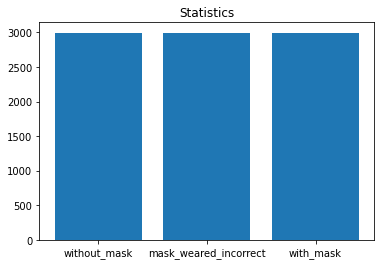

In [46]:
# Plot count of each ouput label
import matplotlib.pyplot as plt

count=[]
for label in output_classes:
  this_path=path+label
  dir=pathlib.Path(this_path)
  im_count=os.listdir(dir)
  count.append(len(im_count))

print(count)

plt.bar(output_classes,count)
plt.title("Statistics")
plt.show()

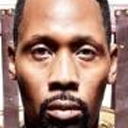

without_mask


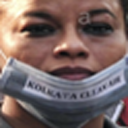

mask_weared_incorrect


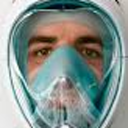

with_mask


In [47]:
# Check some sample images (Use of cv2)
import cv2
from google.colab.patches import cv2_imshow

# Your code
for label in output_classes:
    pathCurr = path + label
    i = cv2.imread(pathCurr+'/1.png')
    cv2_imshow(i)
    print(label)

In [48]:
# Check shape of the images in your dataset. This will be helpful while specifying input_shape in your Transfer Learning Model
accurate_size = (128,128,3)
# accurate_size = (224,224,3)
img_h = accurate_size[0]
img_w = accurate_size[1]
batch = 32

In [49]:
# Check if all the images have same shape, else you need to resize them to some common size
# The code provided as it is above in the template will help 
sizes = []
for label in output_classes:
    pathCurr = path + label
    for filename in os.listdir(pathCurr):
        img = cv2.imread(os.path.join(pathCurr,filename))
        sizes.append(img.shape)
        if (img.shape != temp):
            print("Different shape: " + str(img.shape))
            print(os.path.join(pathCurr,filename))

In [50]:
# If the shape is variable, reshape to a common size 
# If it is same, prove it
allEqual = True
for i in range(1, len(sizes)-1):
    if (sizes[i] != sizes[i+1]):
        allEqual = False
        break;
print(allEqual)

True


In [51]:
# Anything else you want to plot/experiment
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.9,
  subset="training",
  seed=123,
  image_size=(img_h, img_w),
  batch_size=batch)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.02,
  subset="validation",
  seed=123,
  image_size=(img_h, img_w),
  batch_size=batch)

Found 8982 files belonging to 3 classes.
Using 899 files for training.
Found 8982 files belonging to 3 classes.
Using 179 files for validation.


### Model Definition
Choose a model for Transfer Learning (You may also experment with multiple models and keep all of them in this notebook)

In [52]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [53]:
# Choose and define base model
from keras.applications.vgg16 import VGG16
vgg = VGG16(input_shape=accurate_size, weights='imagenet', include_top=False)

In [54]:
# Print base model summary and have a look at the layers


In [55]:
# As we're using Transfer Learning, you do not need to train all the layers. Freeze all of the layers or train some layers (experiment)
for layer in vgg.layers:
    layer.trainable = False

In [56]:
# Append Fully connected/custom Conv2D/Dropout/MaxPooling layers to the base model

In [57]:
# Add the final output layer
x = Flatten()(vgg.output)
prediction = Dense(3, activation="softmax")(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [58]:
# Print your model's summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [59]:
# Compile you model (set the parameters like loss/optimizers/metrics)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optim,
              metrics=['accuracy'])

### Data Augmentation and Pre-processing
Augment the data. You may also try dyanamic augmentation using [`tf.keras.preprocessing.image.ImageDataGenerator `](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).   
You may use [`tf.keras.applications.vgg16.preprocess_input`](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)(or some other base model's utility) for pre-processing (can also be passed as a parameter to `ImageDataGenerator`)

In [60]:
from keras.applications.vgg16 import preprocess_input # Change according to your base model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Your code 
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
# Anything else you wish to try

### Training and Validation Dataset  
Split the dataset into training and validation (We'll be looking for your validation accuracy, assume we are using complete dataset for now). 

Hint: `flow_from_directory` used with `ImageDataGenerator` will simplify things for you.

In [61]:
train_set = train_datagen.flow_from_directory(path,
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(path,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 8982 images belonging to 3 classes.
Found 8982 images belonging to 3 classes.


### Training  
Train your model for some epochs and plot the graph. Try and save your best model. Experiment with the parameters of `model.fit`

In [62]:
from keras.callbacks import ModelCheckpoint
# ModelCheckpoint is helpful to save the model giving best results (brownie points)
hist = model.fit(train_set, 
                 validation_data=test_set,
                 epochs=4, 
                 validation_steps=32,
                 verbose=2)

Epoch 1/4
281/281 - 62s - loss: 0.4588 - accuracy: 0.9208 - val_loss: 0.2520 - val_accuracy: 0.9580 - 62s/epoch - 222ms/step
Epoch 2/4
281/281 - 59s - loss: 0.2534 - accuracy: 0.9613 - val_loss: 0.2366 - val_accuracy: 0.9609 - 59s/epoch - 211ms/step
Epoch 3/4
281/281 - 60s - loss: 0.2428 - accuracy: 0.9694 - val_loss: 0.1927 - val_accuracy: 0.9766 - 60s/epoch - 215ms/step
Epoch 4/4
281/281 - 60s - loss: 0.2556 - accuracy: 0.9701 - val_loss: 0.1296 - val_accuracy: 0.9844 - 60s/epoch - 213ms/step


### Evaluate the performance

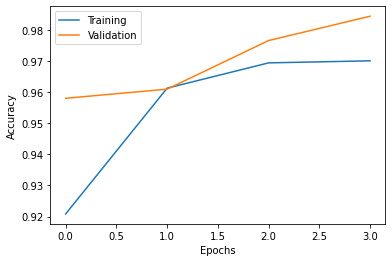

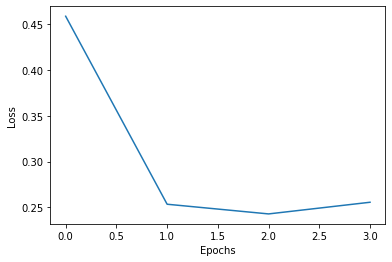

In [63]:
# Plot training & validation loss/accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(hist.history['loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [64]:
predictions = model.predict(test_set)

In [65]:
import numpy as np
pred = []
for max in predictions:
    pred.append(np.argmax(max))

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# print classification report
print(classification_report(test_set.labels, pred, target_names=['without_mask','mask_weared_incorrect','with_mask']))

                       precision    recall  f1-score   support

         without_mask       0.32      0.32      0.32      2994
mask_weared_incorrect       0.35      0.35      0.35      2994
            with_mask       0.33      0.33      0.33      2994

             accuracy                           0.33      8982
            macro avg       0.33      0.33      0.33      8982
         weighted avg       0.33      0.33      0.33      8982



In [ ]:
# Use the classification report to print precision, recall, f1-score for the three classes(optional, brownie points)